<ipython-input-7-1081beb9bbe6>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
<ipython-input-7-1081beb9bbe6>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


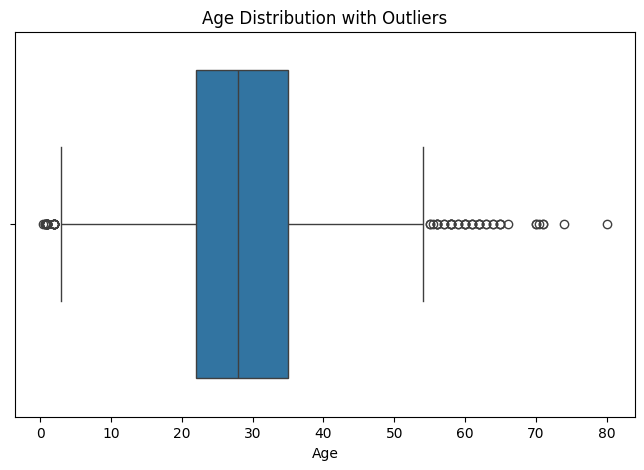

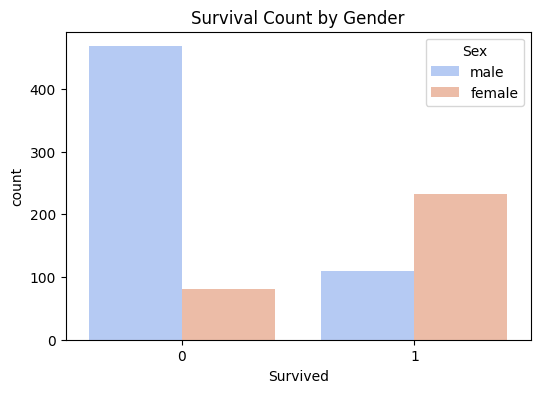

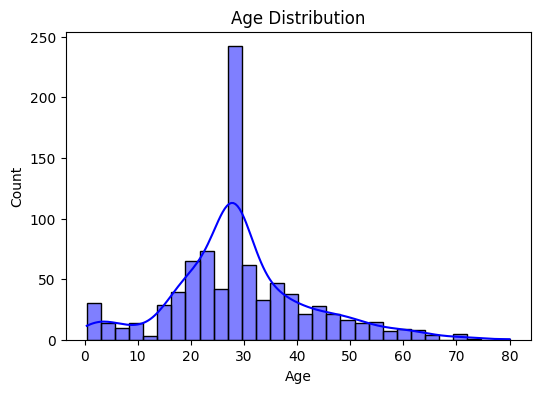

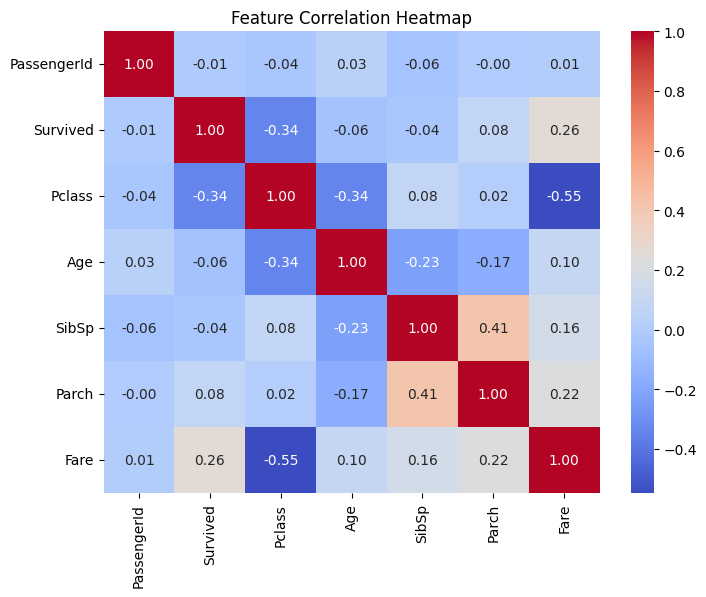


Key Insights:
- Majority of missing values were in 'Cabin', so it was dropped.
- Age had missing values, filled with median.
- More females survived compared to males.
- Heatmap shows strong correlation between 'Pclass' and 'Fare'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display first 5 rows
df.head()


# Data Cleaning
# Check for missing values
df.isnull().sum()

# Fill missing Age values with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing Embarked values with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop Cabin column (too many missing values)
df.drop(columns=["Cabin"], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Show updated dataset info
df.info()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Age"])
plt.title("Age Distribution with Outliers")
plt.show()
plt.figure(figsize=(6, 4))
sns.countplot(x="Survived", hue="Sex", data=df, palette="coolwarm")
plt.title("Survival Count by Gender")
plt.savefig("survival_by_gender.png", bbox_inches="tight")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution")

plt.savefig("Age_Distribution.png", bbox_inches="tight")
plt.show()
# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.savefig("heat_map.png", bbox_inches="tight")
plt.show()

print("\nKey Insights:")
print("- Majority of missing values were in 'Cabin', so it was dropped.")
print("- Age had missing values, filled with median.")
print("- More females survived compared to males.")
print("- Heatmap shows strong correlation between 'Pclass' and 'Fare'.")


from google.colab import files
files.download("survival_by_gender.png")

In [6]:
# Task 2: Text Sentiment Analysis

import nltk
# Download 'wordnet' dataset
nltk.download('wordnet')

import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load dataset (Replace with actual dataset path)
# Sample dataset can be IMDB dataset
# df = pd.read_csv("imdb_reviews.csv")

# Example text data
data = {'text': ['I love this movie', 'This film is terrible', 'Absolutely amazing experience', 'Worst movie ever'],
        'sentiment': [1, 0, 1, 0]}

df = pd.DataFrame(data)

# Text preprocessing function
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r"[^a-zA-Z]", " ", text.lower())
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['processed_text'] = df['text'].apply(preprocess_text)

# Convert text into numerical format (TF-IDF)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])
y = df['sentiment']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [3]:
# Task 3: Fraud Detection System

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Load dataset (Replace with actual dataset path)
# df = pd.read_csv("credit_card_fraud.csv")

# Sample dataset
np.random.seed(42)
data = {'feature1': np.random.rand(1000),
        'feature2': np.random.rand(1000),
        'fraud': np.random.choice([0, 1], size=(1000,), p=[0.95, 0.05])}
df = pd.DataFrame(data)

# Handle imbalanced data using SMOTE
X = df.drop(columns=['fraud'])
y = df['fraud']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7712765957446809
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77       179
           1       0.81      0.74      0.77       197

    accuracy                           0.77       376
   macro avg       0.77      0.77      0.77       376
weighted avg       0.77      0.77      0.77       376



RMSE: 168266.88862584354
R² Score: -0.2693632318143748


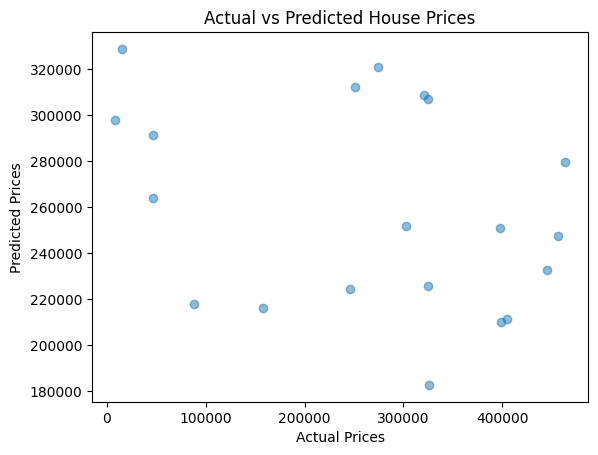

In [5]:
# Task 4: Predicting House Prices

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset (Boston Housing Dataset - Replace with actual dataset path)
# df = pd.read_csv("boston_housing.csv")

# Sample dataset
np.random.seed(42)
data = {'feature1': np.random.rand(100),
        'feature2': np.random.rand(100),
        'price': np.random.rand(100) * 500000}
df = pd.DataFrame(data)

# Train-test split
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Custom Linear Regression Model
class CustomLinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        self.intercept_ = theta_best[0]
        self.coef_ = theta_best[1:]

    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_

# Train Linear Regression Model
lr_model = CustomLinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Evaluation
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred))) # Calculate RMSE manually
print("R² Score:", r2_score(y_test, y_pred))

# Plot predictions
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
